In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install wordcloud
!pip install xgboost

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re 


In [4]:
data=pd.read_csv(r"Data\amazon_alexa.tsv", delimiter='\t',quoting=3)

print(f"Dataset shape: {data.shape}")

Dataset shape: (3150, 5)


In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
#column names

print(f"feature names : {data.columns.values}")

feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [7]:
#check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
#Getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [9]:
#drop null record

data.dropna(inplace=True)

In [10]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [11]:
data['length']=data['verified_reviews'].apply(len)

In [12]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [13]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}")
print(f"'Length of review' : {len(data.iloc[10]['verified_reviews'])}")
print(f"'length' column value : {data.iloc[10]['length']}")

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
'Length of review' : 65
'length' column value : 65


In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [15]:
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


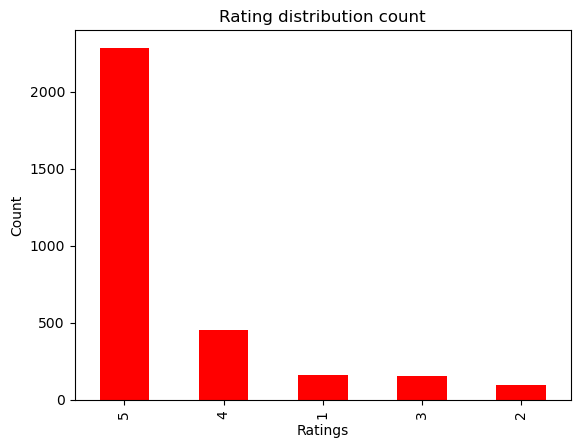

In [16]:
#Bar plot to visulaize total count of each rating

data['rating'].value_counts().plot.bar(color='red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [17]:
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


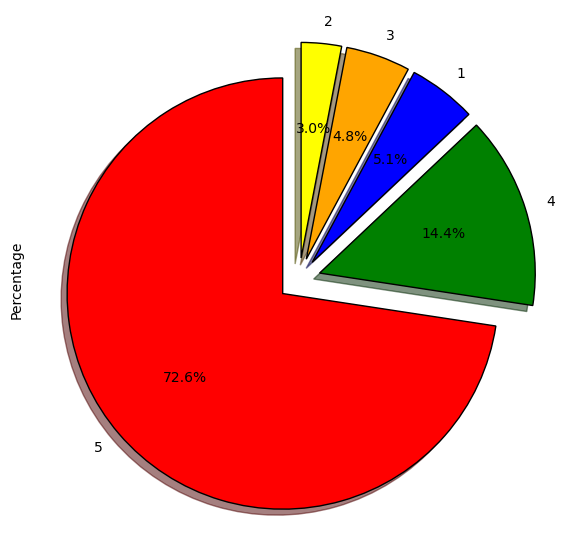

In [18]:
fig=plt.figure(figsize=(7,7))

colors=('red','green','blue','orange','yellow')

wp={'linewidth':1,"edgecolor":'black'}

tags=data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage')

from io import BytesIO
graph=BytesIO()

fig.savefig(graph, format="png")

In [19]:
#feedback column

print(f"feedback value count:\n{data['feedback'].value_counts()}")

feedback value count:
feedback
1    2893
0     256
Name: count, dtype: int64


In [20]:
review_0=data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [21]:
review_1=data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


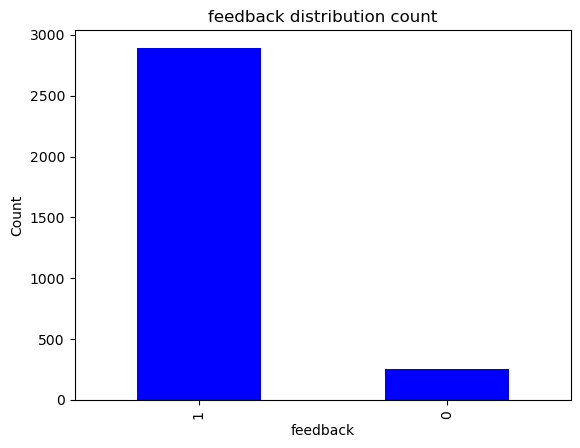

In [22]:
#Bar graph

data['feedback'].value_counts().plot.bar(color='blue')
plt.title('feedback distribution count')
plt.xlabel('feedback')
plt.ylabel('Count')
plt.show()

In [23]:
print(f"feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage'>

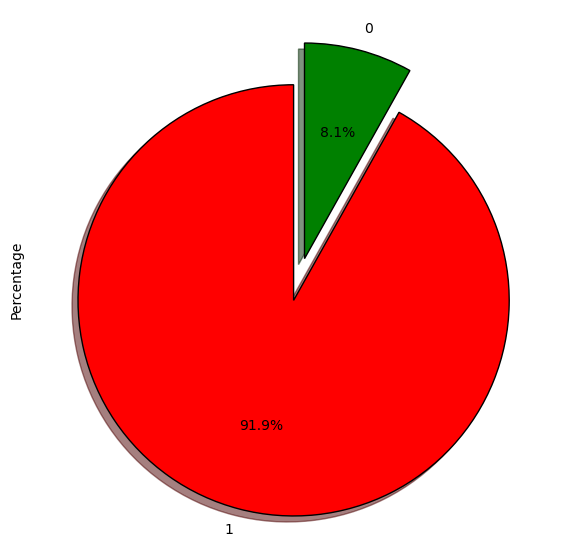

In [24]:
fig=plt.figure(figsize=(7,7))

colors=('red','green')

wp={'linewidth':1, "edgecolor":'black'}

tags=data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie',autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='Percentage')

In [25]:
#feedback=0

data[data['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [26]:
#feedback=1

data[data['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [27]:
#variation column

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [28]:
data.groupby('variation')['rating'].mean()



variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

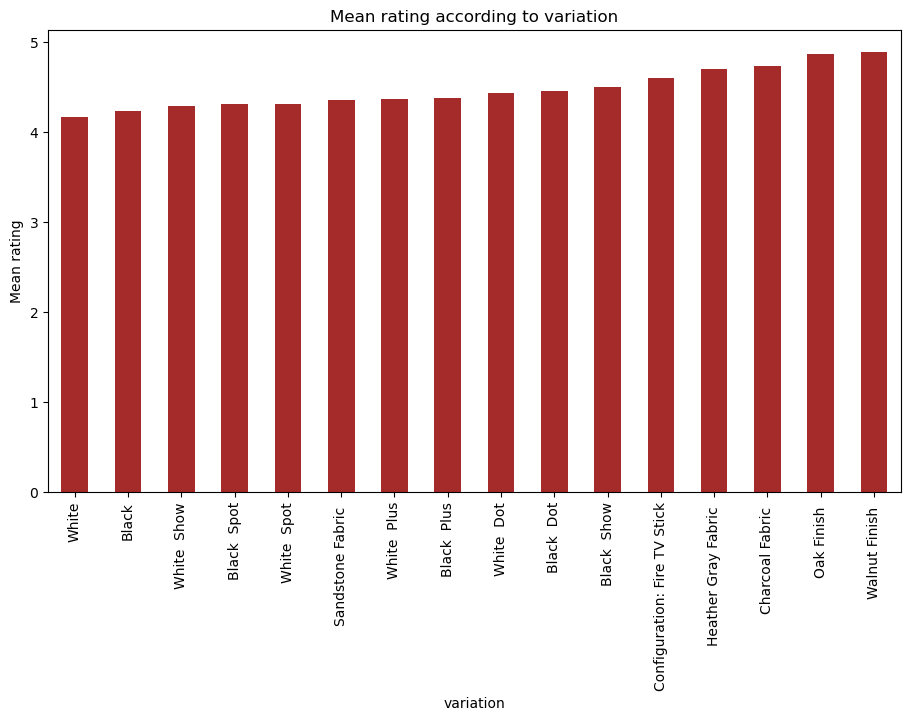

In [29]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color='brown', figsize=(11,6))
plt.title("Mean rating according to variation")
plt.xlabel('variation')
plt.ylabel('Mean rating')
plt.show()

In [30]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review')]

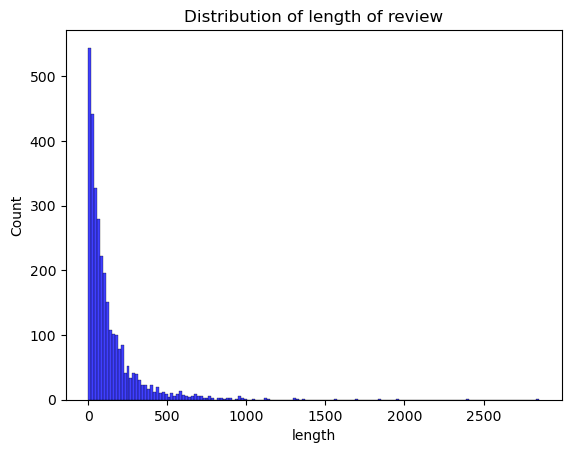

In [31]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review')]

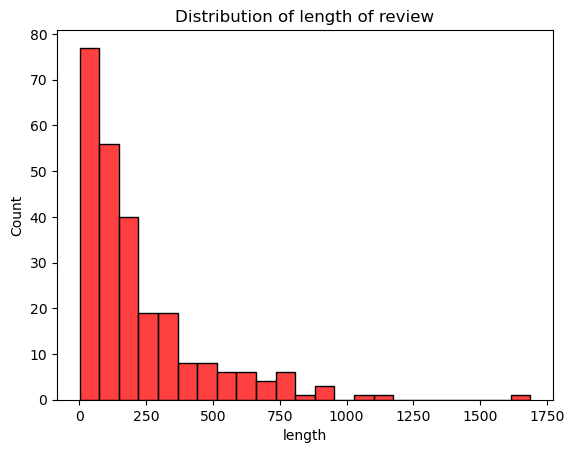

In [32]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review')]

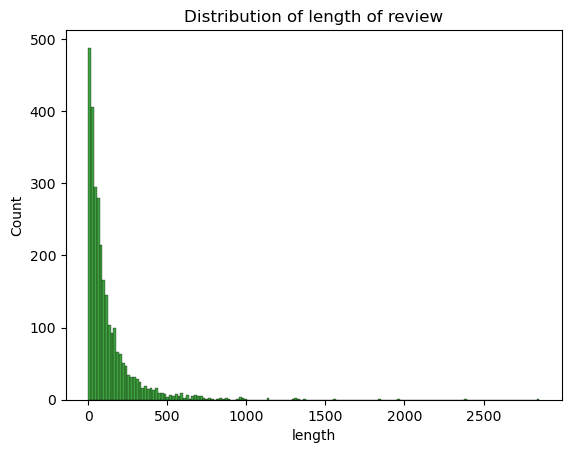

In [33]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review')

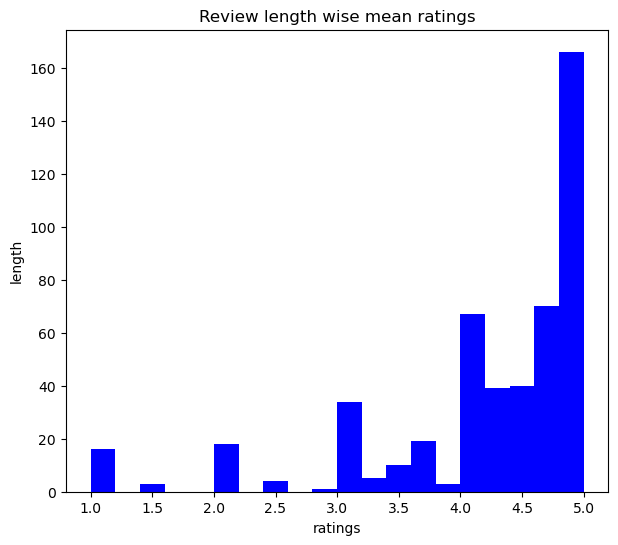

In [34]:
data.groupby('length')['rating'].mean().plot.hist(color='blue',figsize=(7,6),bins=20)
plt.title("Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [35]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

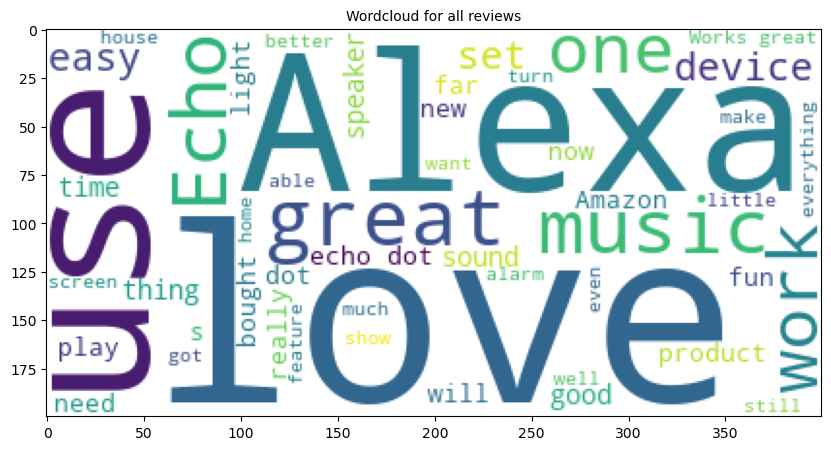

In [36]:
#combine all review
reviews=" ".join([review for review in data['verified_reviews']])

#Intialize wordcloud object
wc=WordCloud(background_color='white',max_words=50)

#generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis=('off')
plt.show()

In [37]:
#combine all reveiw for each feedback category and splitting them nto individual words
neg_reviews=" ".join([review for review in data[data['feedback']==0]['verified_reviews']])
neg_reviews=neg_reviews.lower().split()

pos_reviews=" ".join([review for review in data[data['feedback']==1]['verified_reviews']])
pos_reviews=pos_reviews.lower().split()

#finding words from reviews which are present in that feedback category only
unique_negative=[x for x in neg_reviews if x not in pos_reviews]
unique_negative=" ".join(unique_negative)

unique_positive=[x for x in neg_reviews if x not in pos_reviews]
unique_positive=" ".join(unique_positive)

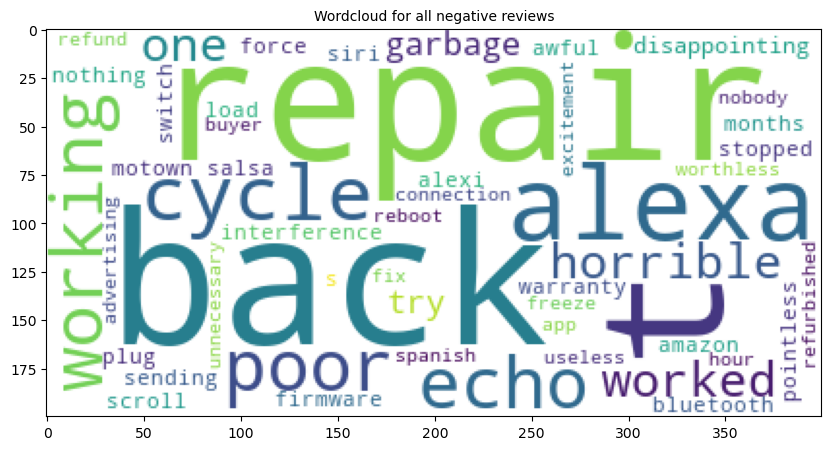

In [38]:
wc=WordCloud(background_color='white',max_words=50)

#generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for all negative reviews', fontsize=10)
plt.axis=('off')
plt.show()

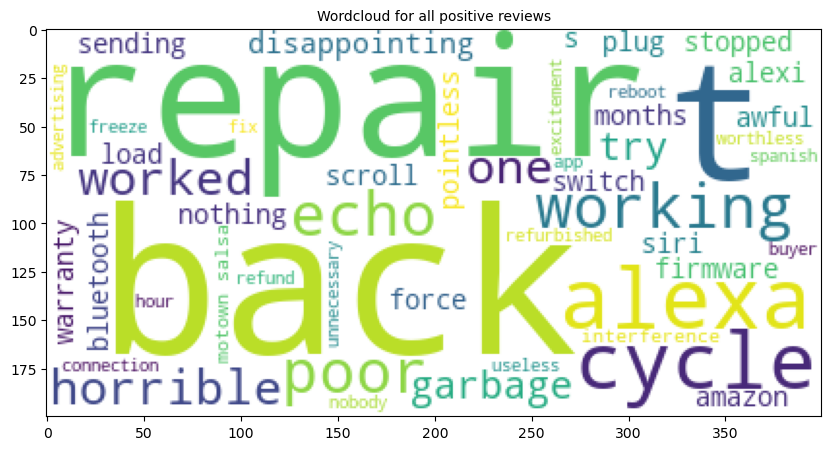

In [39]:
wc=WordCloud(background_color='white',max_words=50)

#generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for all positive reviews', fontsize=10)
plt.axis=('off')
plt.show()

In [40]:
#preprocssing and modeling

corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',data.iloc[i]['verified_reviews'])
    review=review.lower().split()
    review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)

In [41]:
cv=CountVectorizer(max_features=2500)

#storing independent and dependent variable in x and y
X=cv.fit_transform(corpus).toarray()
y=data['feedback'].values 

In [42]:
#saving count vectorize
pickle.dump(cv, open('Models/countVectorizer.pkl','wb'))

In [43]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test:  {X_test.shape}")
print(f"y test:  {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test:  (945, 2500)
y test:  (945,)


In [45]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value:  {X_test.max()}")

X train max value: 12
X test max value:  10


In [46]:
scaler=MinMaxScaler()

X_train_scl=scaler.fit_transform(X_train)
X_test_scl=scaler.fit_transform(X_test)

In [47]:
pickle.dump(scaler, open('Models/scaler.pkl','wb'))

In [48]:
#random forest
model_rf=RandomForestClassifier()
model_rf.fit(X_train_scl,y_train)

RandomForestClassifier()

In [49]:
#accuracy of the model
print("Training Accuracy :", model_rf.score(X_train_scl,y_train))

print("Testing Accuracy :", model_rf.score(X_test_scl,y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9470899470899471


In [50]:
y_preds=model_rf.predict(X_test_scl)

In [51]:
cm=confusion_matrix(y_test,y_preds)

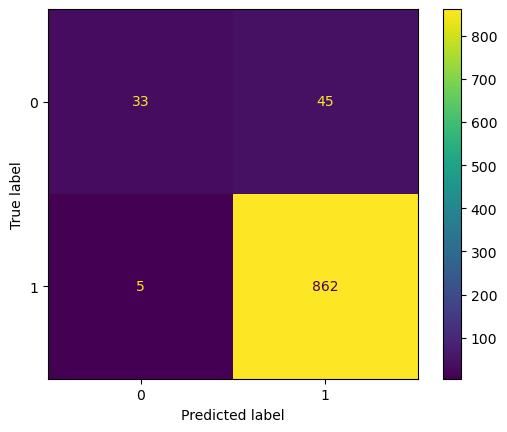

In [52]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [53]:
accuracies=cross_val_score(estimator=model_rf, X=X_train_scl,y=y_train,cv=10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9323981900452489
Standard Variance : 0.009167329484203793


In [54]:
params={
    'bootstrap':[True],
    'max_depth':[80,100],
    'min_samples_split':[8,12],
    'n_estimators':[100,300]
    }

In [55]:
cv_object=StratifiedKFold(n_splits=2)

grid_search=GridSearchCV(estimator=model_rf, param_grid=params, cv=cv_object,verbose=0,return_train_score=True)
grid_search.fit(X_train_scl,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [56]:
print("Best parameter Combination : {}".format(grid_search.best_params_))

Best parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [57]:
print("cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :",accuracy_score(y_test,y_preds))

cross validation mean accuracy on train set : 96.79559891107078
cross validation mean accuracy on test set : 92.16197822141561
Accuracy score for test set : 0.9470899470899471


In [58]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
print("Training Accuracy :", model_xgb.score(X_train_scl,y_train))
print("Testing Accuracy :",model_xgb.score(X_test_scl,y_test))

Training Accuracy : 0.9718693284936479
Testing Accuracy : 0.9333333333333333


In [60]:
y_preds=model_xgb.predict(X_test)

In [61]:
CM=confusion_matrix(y_test,y_preds)
print(cm)

[[ 33  45]
 [  5 862]]


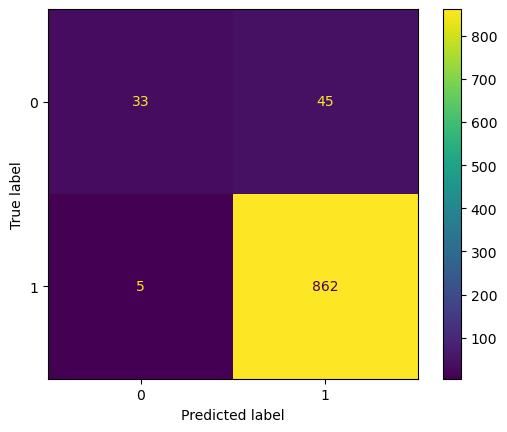

In [62]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [75]:
model_xgb.save_model("Models/model_xgb.json")


In [76]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [77]:
print("Training Accuracy :", model_dt.score(X_train_scl,y_train))
print("Testing Accuracy :",model_dt.score(X_test_scl,y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9068783068783068


In [78]:
y_preds=model_dt.predict(X_test)

In [79]:
cm=confusion_matrix(y_test,y_preds)
print(cm)

[[ 42  36]
 [ 84 783]]


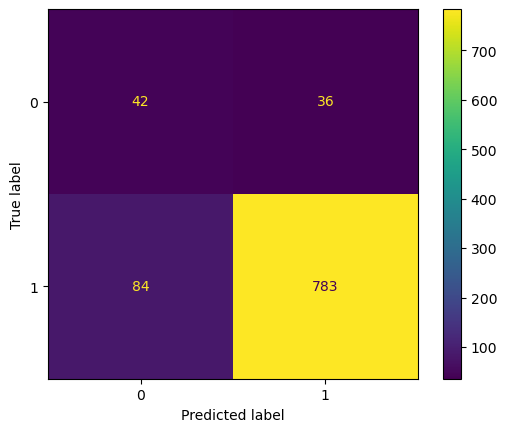

In [80]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()